In [1]:
import os
import pathlib

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import src.utils.time
import src.utils.dict
import src.utils.comps
import src.utils.module
import src.utils.json

import src.comps.heads_pyramid_2

In [2]:
tab20_color_list =\
    [mpl.colormaps["tab20"](x) for x in (np.linspace(0, 1-1/20, 20) + 1/(2*20))[0::2]] +\
    [mpl.colormaps["tab20"](x) for x in (np.linspace(0, 1-1/20, 20) + 1/(2*20))[1::2]]

---

In [3]:
exp_data_all = {}

In [4]:
data_subdir_name = "ret_train"
backbone_name = "convnext_t"
exp_name_list = [
    "test_{:03d}".format(idx) for idx in [2]
]
    
#

if data_subdir_name not in exp_data_all.keys(): exp_data_all[data_subdir_name] = {}
exp_data_all[data_subdir_name][backbone_name] = {}

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", data_subdir_name, backbone_name)

for exp_name in exp_name_list:

    exp_filename = os.path.join(exp_dirname, exp_name, "exp_data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    exp_data_all[data_subdir_name][backbone_name][exp_name] = exp_data

In [5]:
data_subdir_name = "ret_train_pyr_2"
backbone_name = "convnext_t_s1"
exp_name_list = [
    "exp_{:03d}".format(idx) for idx in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
]
    
#

if data_subdir_name not in exp_data_all.keys(): exp_data_all[data_subdir_name] = {}
exp_data_all[data_subdir_name][backbone_name] = {}

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", data_subdir_name, backbone_name)

for exp_name in exp_name_list:

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_1__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    exp_data_all[data_subdir_name][backbone_name][exp_name] = exp_data

In [6]:
data_subdir_name = "ret_train_old_smpl"
backbone_name = "convnext_t_s1"
exp_name_list = [
    "exp_{:03d}".format(idx) for idx in [0, 9, 12, 13, 14]
]
    
#

if data_subdir_name not in exp_data_all.keys(): exp_data_all[data_subdir_name] = {}
exp_data_all[data_subdir_name][backbone_name] = {}

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", data_subdir_name, backbone_name)

for exp_name in exp_name_list:

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_1__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    exp_data_all[data_subdir_name][backbone_name][exp_name] = exp_data

In [7]:
data_subdir_name = "ret_train_DDP_2"
backbone_name = "swint_v2_t"
exp_name_list = [
    "run_{:03d}".format(idx) for idx in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
]
    
#

if data_subdir_name not in exp_data_all.keys(): exp_data_all[data_subdir_name] = {}
exp_data_all[data_subdir_name][backbone_name] = {}

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", data_subdir_name, backbone_name)

for exp_name in exp_name_list:

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_1__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    exp_data_all[data_subdir_name][backbone_name][exp_name] = exp_data

In [8]:
data_subdir_name = "ret_train_old_smpl"
backbone_name = "swint_v2_t_s1"
exp_name_list = [
    "exp_{:03d}".format(idx) for idx in [13, 14, 15]
]
    
#

if data_subdir_name not in exp_data_all.keys(): exp_data_all[data_subdir_name] = {}
exp_data_all[data_subdir_name][backbone_name] = {}

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", data_subdir_name, backbone_name)

for exp_name in exp_name_list:

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_1__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    exp_data_all[data_subdir_name][backbone_name][exp_name] = exp_data

In [9]:
exp_data_all.keys()

dict_keys(['ret_train', 'ret_train_pyr_2', 'ret_train_old_smpl', 'ret_train_DDP_2'])

In [10]:
exp_data_all["ret_train_pyr_2"].keys()

dict_keys(['convnext_t_s1'])

In [11]:
exp_data_all["ret_train_DDP_2"].keys()

dict_keys(['swint_v2_t'])

In [12]:
exp_data_all["ret_train_old_smpl"].keys()

dict_keys(['convnext_t_s1', 'swint_v2_t_s1'])

---

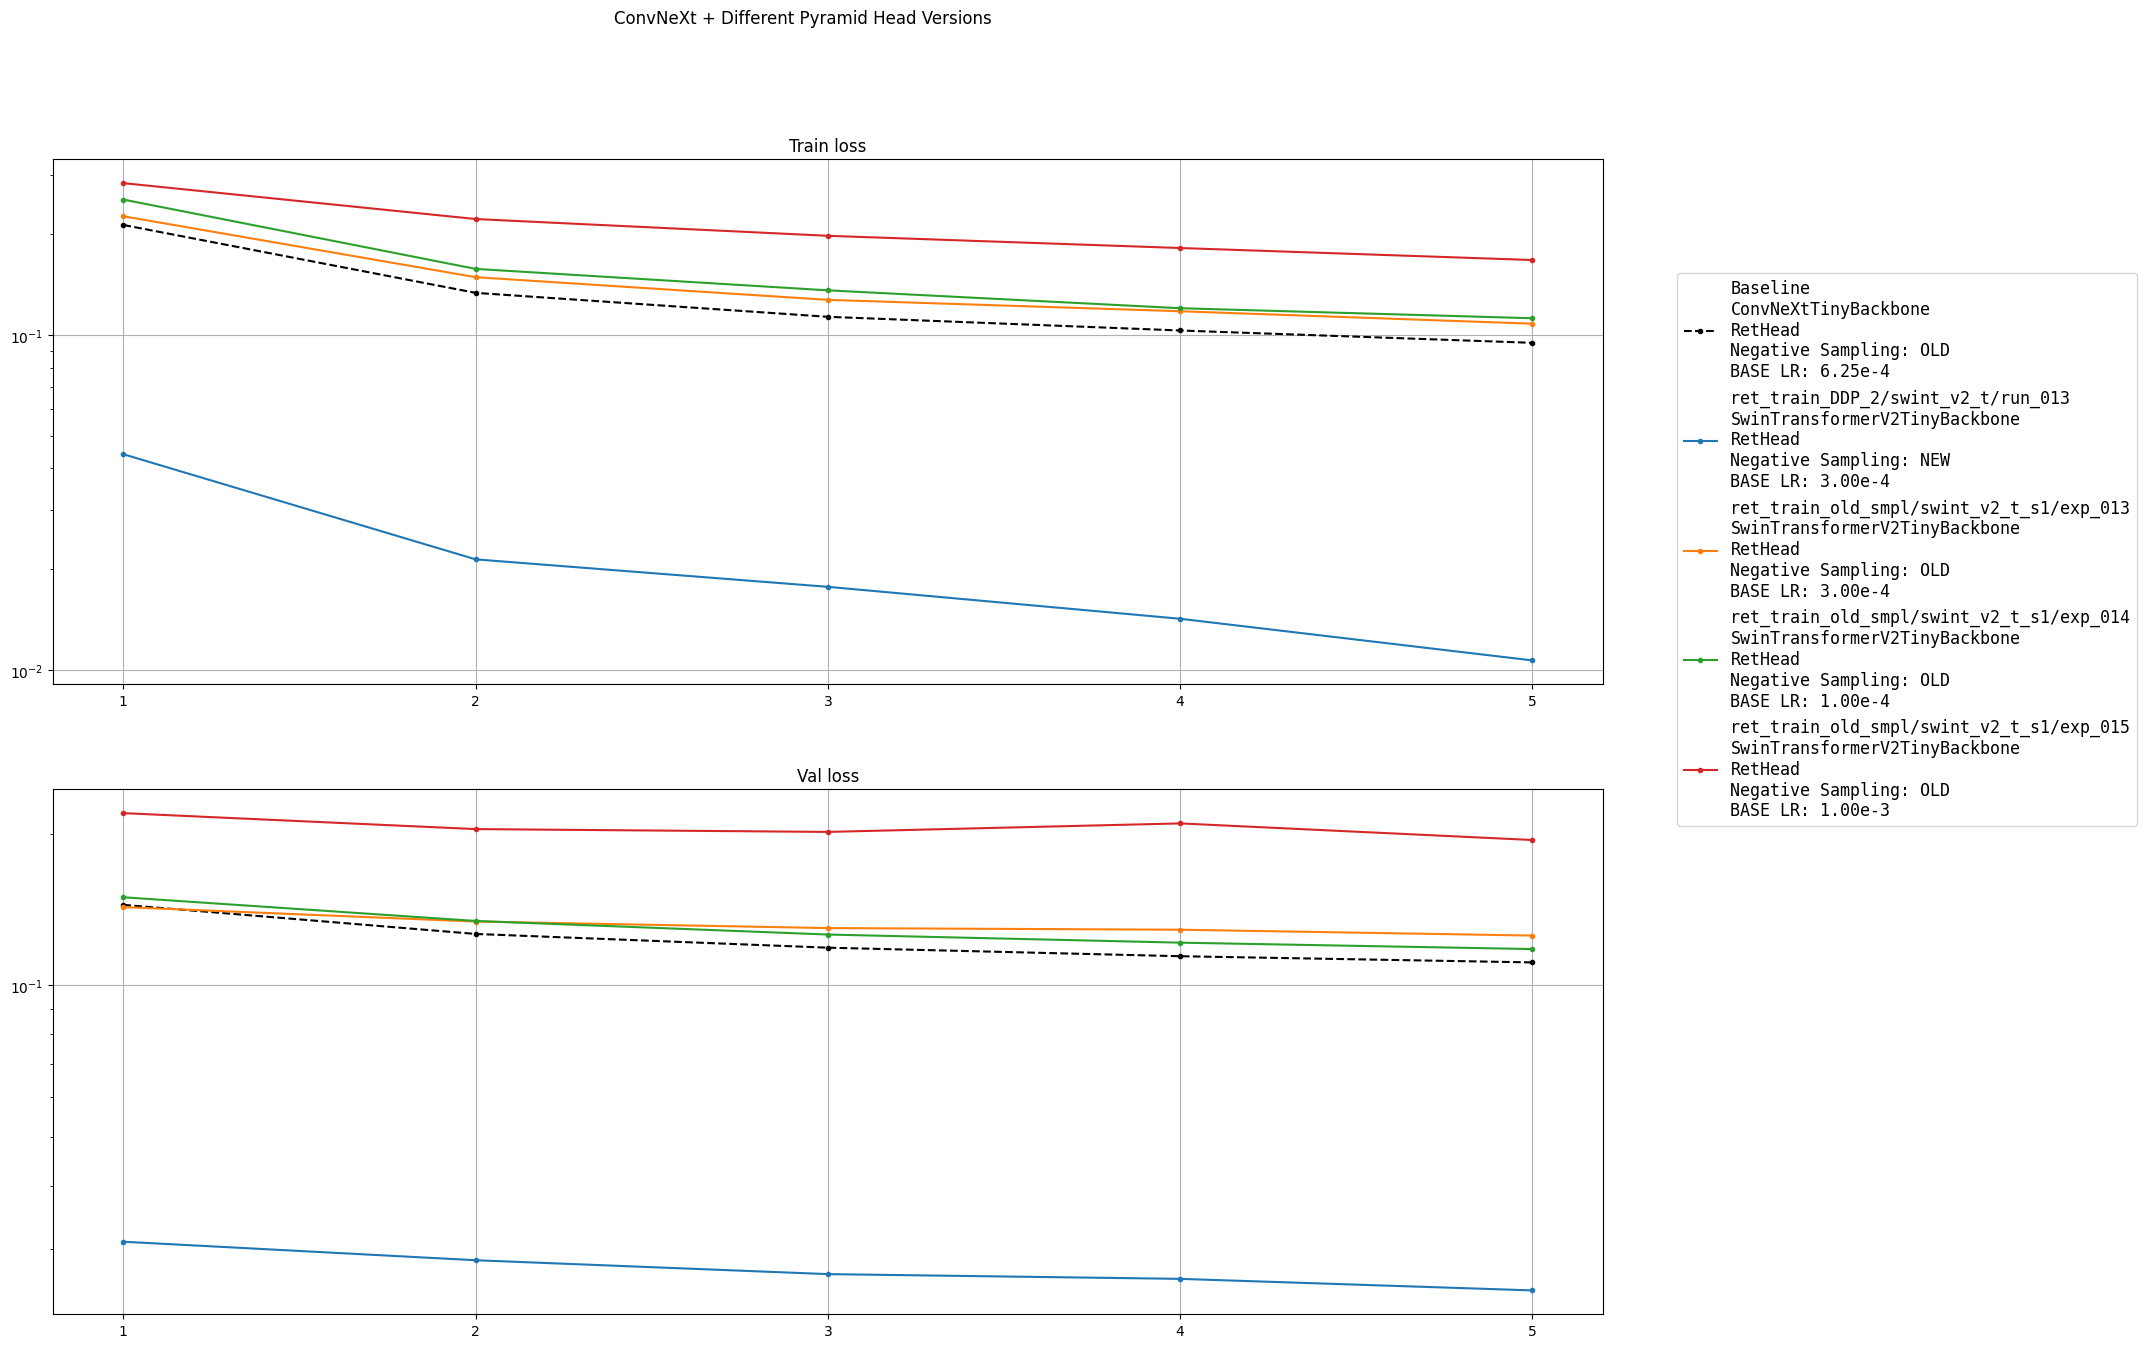

In [13]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 15))

# Baseline

exp_data = exp_data_all["ret_train"]["convnext_t"]["test_002"]

train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]][:5]
val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]][:5]

finished = exp_data["results"]["stage_1"]["finished"]

backbone_class = exp_data["settings"]["backbone"]["class"]
head_class = exp_data["settings"]["heads"][0]["class"]

base_lr = 6.25e-4

title_lines = []
title_lines.append("Baseline")
title_lines.append("{:s}".format(backbone_class))
title_lines.append("{:s}".format(head_class))
title_lines.append("Negative Sampling: OLD")
title_lines.append("BASE LR: {:s}".format(np.format_float_scientific(base_lr, min_digits=2, exp_digits=1)))
label = "\n".join(title_lines)

axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, color="black", marker=".", linestyle="--")
axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, color="black", marker=".", linestyle="--")

# Experiments

for idx, (exp_name, exp_data) in enumerate(exp_data_all["ret_train_DDP_2"]["swint_v2_t"].items()):

    if exp_name not in ["run_013"]:
        continue

    train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]][:5]
    val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]][:5]

    base_lr = exp_data["settings"]["stage_1"]["optimizer"]["lr"]

    finished = exp_data["results"]["stage_1"]["finished"]

    backbone_class = exp_data["settings"]["backbone"]["class"]
    if "head" in exp_data["settings"].keys():
        head_class = exp_data["settings"]["head"]["class"]
    else:
        head_class = exp_data["settings"]["heads"][0]["class"]

    # Title

    title_lines = []
    title_lines.append("{:s}/{:s}/{:s}".format("ret_train_DDP_2", "swint_v2_t", exp_name))  
    title_lines.append("{:s}".format(backbone_class))
    title_lines.append("{:s}".format(head_class))
    title_lines.append("Negative Sampling: NEW")
    title_lines.append("BASE LR: {:s}".format(np.format_float_scientific(base_lr, min_digits=2, exp_digits=1)))
    label = "\n".join(title_lines)

    # Plot

    axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, marker=".")
    axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, marker=".")

# Experiments

for idx, (exp_name, exp_data) in enumerate(exp_data_all["ret_train_old_smpl"]["swint_v2_t_s1"].items()):

    train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]][:5]
    val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]][:5]

    base_lr = exp_data["settings"]["stage_1"]["optimizer"]["lr"]

    finished = exp_data["results"]["stage_1"]["finished"]

    backbone_class = exp_data["settings"]["backbone"]["class"]
    if "head" in exp_data["settings"].keys():
        head_class = exp_data["settings"]["head"]["class"]
    else:
        head_class = exp_data["settings"]["heads"][0]["class"]

    # Title

    title_lines = []
    title_lines.append("{:s}/{:s}/{:s}".format("ret_train_old_smpl", "swint_v2_t_s1", exp_name))  
    title_lines.append("{:s}".format(backbone_class))
    title_lines.append("{:s}".format(head_class))
    title_lines.append("Negative Sampling: OLD")
    title_lines.append("BASE LR: {:s}".format(np.format_float_scientific(base_lr, min_digits=2, exp_digits=1)))
    label = "\n".join(title_lines)

    # Plot

    axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, marker=".")
    axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, marker=".")

# Generic settings

axs[0].set_xticks([1, 2, 3, 4, 5])
axs[1].set_xticks([1, 2, 3, 4, 5])

axs[0].set_yscale("log")
axs[1].set_yscale("log")

axs[0].grid()
axs[1].grid()

axs[0].set_title("Train loss")
axs[1].set_title("Val loss")

plt.suptitle("ConvNeXt + Different Pyramid Head Versions")
plt.legend(prop={'family': 'monospace', "size": 12}, bbox_to_anchor=(1.35, 2.00))
plt.show()

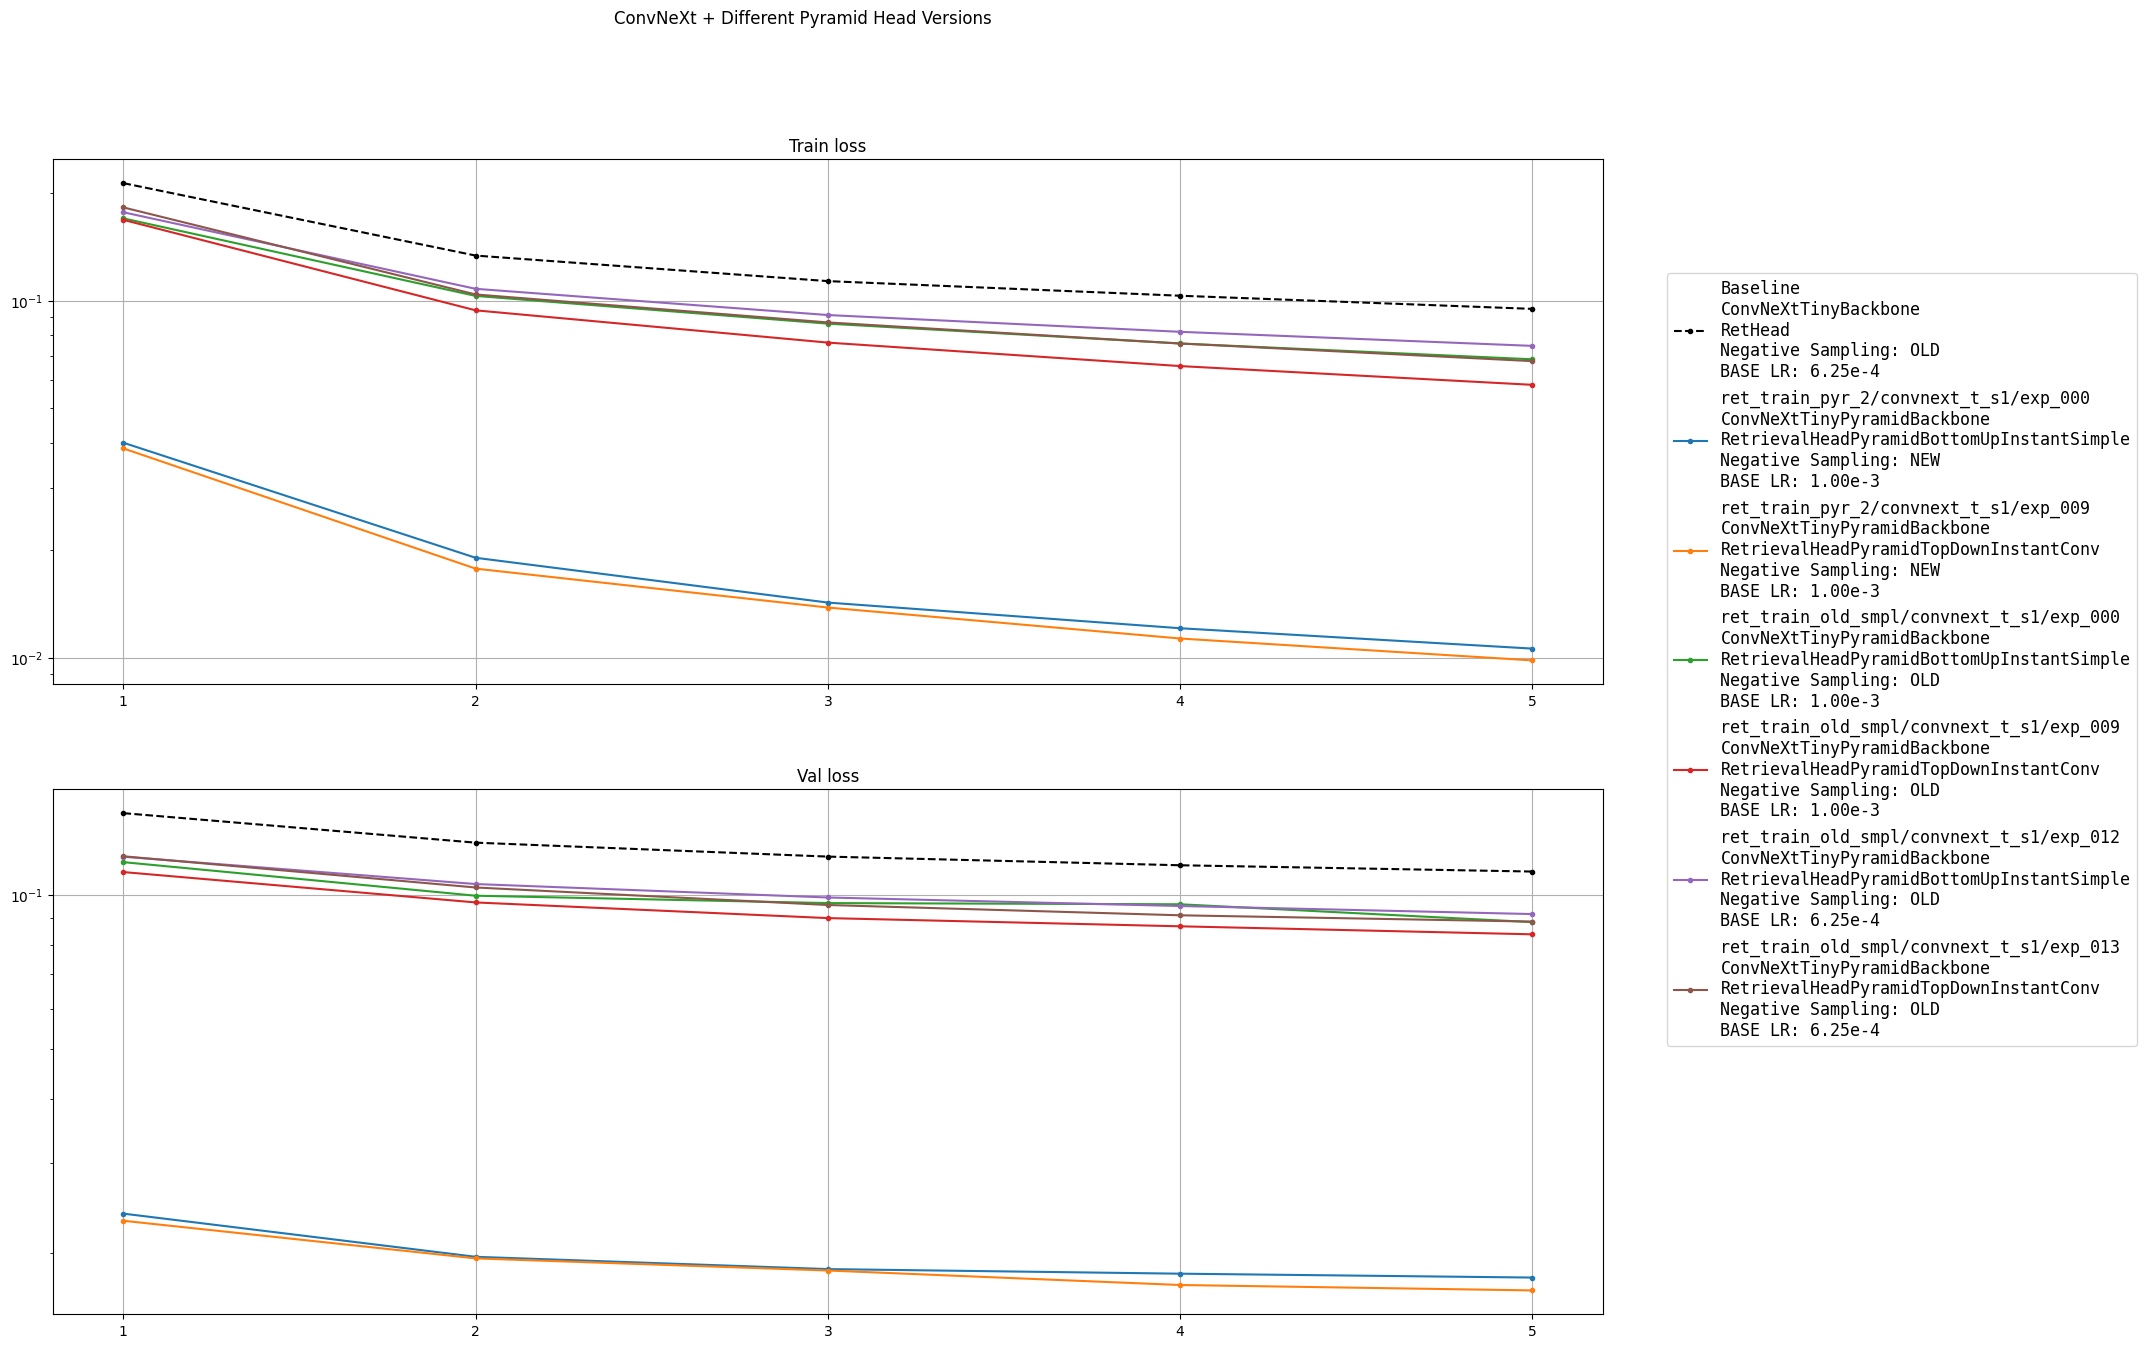

In [14]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 15))

# Baseline

exp_data = exp_data_all["ret_train"]["convnext_t"]["test_002"]

train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]][:5]
val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]][:5]

finished = exp_data["results"]["stage_1"]["finished"]

backbone_class = exp_data["settings"]["backbone"]["class"]
head_class = exp_data["settings"]["heads"][0]["class"]

base_lr = 6.25e-4

title_lines = []
title_lines.append("Baseline")
title_lines.append("{:s}".format(backbone_class))
title_lines.append("{:s}".format(head_class))
title_lines.append("Negative Sampling: OLD")
title_lines.append("BASE LR: {:s}".format(np.format_float_scientific(base_lr, min_digits=2, exp_digits=1)))
label = "\n".join(title_lines)

axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, color="black", marker=".", linestyle="--")
axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, color="black", marker=".", linestyle="--")

# Experiments

for idx, (exp_name, exp_data) in enumerate(exp_data_all["ret_train_pyr_2"]["convnext_t_s1"].items()):

    if exp_name not in ["exp_000", "exp_009"]:
        continue

    train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]][:5]
    val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]][:5]

    base_lr = exp_data["settings"]["stage_1"]["optimizer"]["lr"]

    finished = exp_data["results"]["stage_1"]["finished"]

    backbone_class = exp_data["settings"]["backbone"]["class"]
    if "head" in exp_data["settings"].keys():
        head_class = exp_data["settings"]["head"]["class"]
    else:
        head_class = exp_data["settings"]["heads"][0]["class"]

    # Title

    title_lines = []
    title_lines.append("{:s}/{:s}/{:s}".format("ret_train_pyr_2", "convnext_t_s1", exp_name))  
    title_lines.append("{:s}".format(backbone_class))
    title_lines.append("{:s}".format(head_class))
    title_lines.append("Negative Sampling: NEW")
    title_lines.append("BASE LR: {:s}".format(np.format_float_scientific(base_lr, min_digits=2, exp_digits=1)))
    label = "\n".join(title_lines)

    # Plot

    axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, marker=".")
    axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, marker=".")

# Experiments

for idx, (exp_name, exp_data) in enumerate(exp_data_all["ret_train_old_smpl"]["convnext_t_s1"].items()):

    train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]][:5]
    val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]][:5]

    base_lr = exp_data["settings"]["stage_1"]["optimizer"]["lr"]

    finished = exp_data["results"]["stage_1"]["finished"]

    backbone_class = exp_data["settings"]["backbone"]["class"]
    if "head" in exp_data["settings"].keys():
        head_class = exp_data["settings"]["head"]["class"]
    else:
        head_class = exp_data["settings"]["heads"][0]["class"]

    # Title

    title_lines = []
    title_lines.append("{:s}/{:s}/{:s}".format("ret_train_old_smpl", "convnext_t_s1", exp_name))  
    title_lines.append("{:s}".format(backbone_class))
    title_lines.append("{:s}".format(head_class))
    title_lines.append("Negative Sampling: OLD")
    title_lines.append("BASE LR: {:s}".format(np.format_float_scientific(base_lr, min_digits=2, exp_digits=1)))
    label = "\n".join(title_lines)

    # Plot

    axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, marker=".")
    axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, marker=".")

# Generic settings

axs[0].set_xticks([1, 2, 3, 4, 5])
axs[1].set_xticks([1, 2, 3, 4, 5])

axs[0].set_yscale("log")
axs[1].set_yscale("log")

axs[0].grid()
axs[1].grid()

axs[0].set_title("Train loss")
axs[1].set_title("Val loss")

plt.suptitle("ConvNeXt + Different Pyramid Head Versions")
plt.legend(prop={'family': 'monospace', "size": 12}, bbox_to_anchor=(1.35, 2.00))
plt.show()

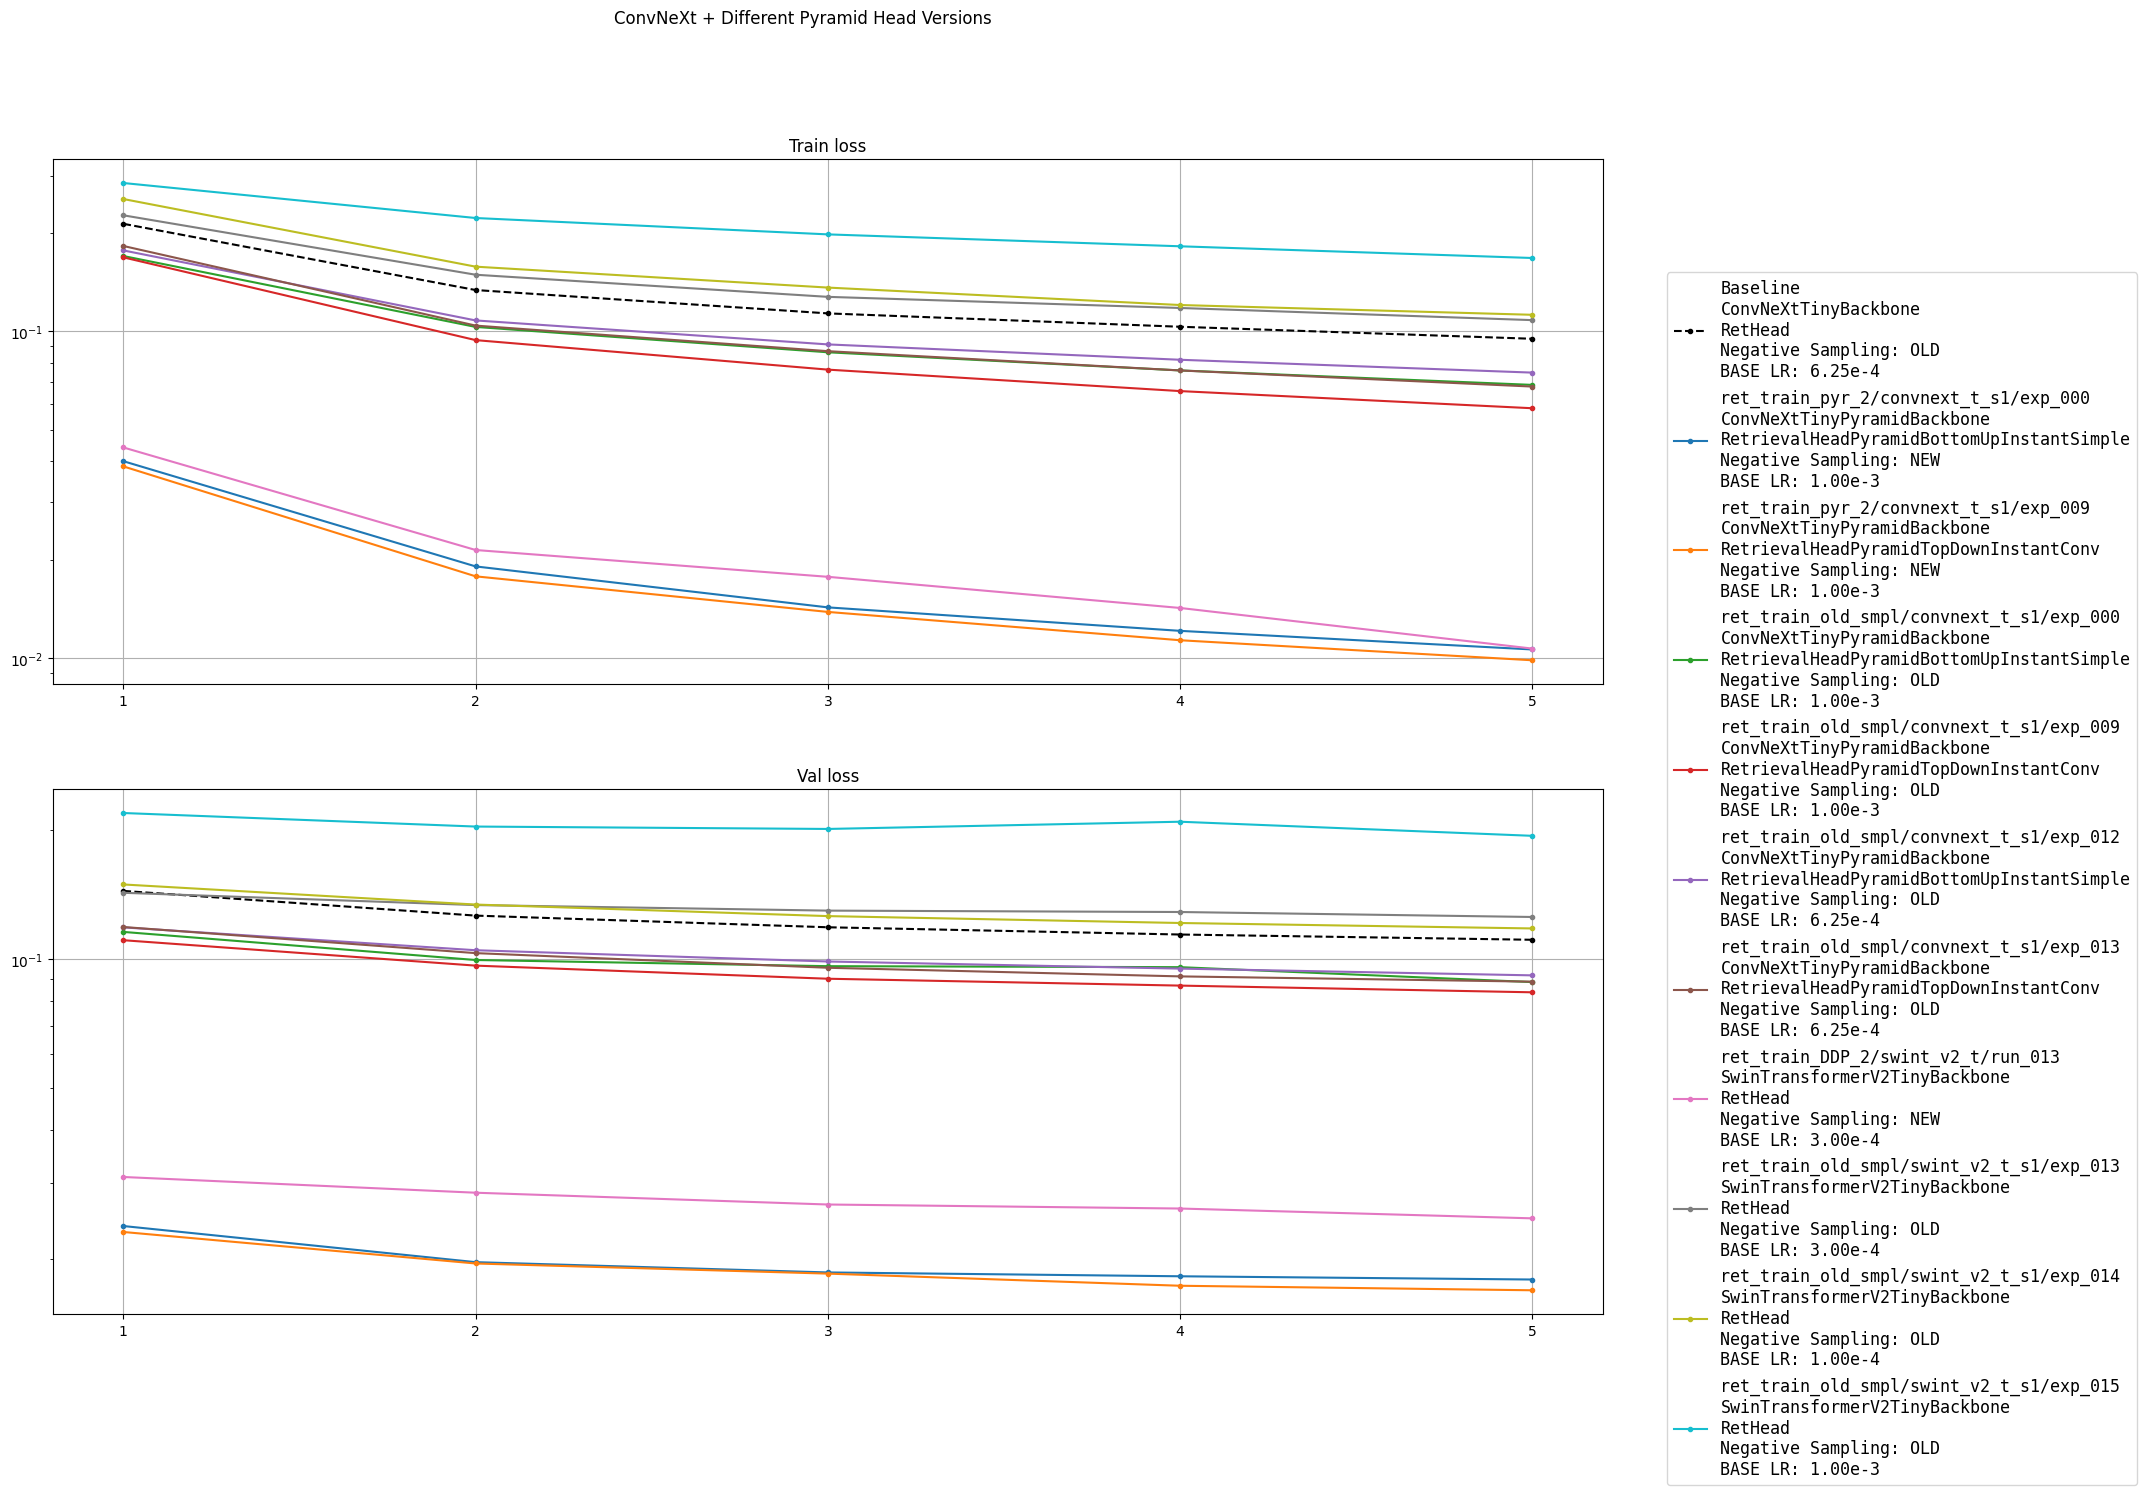

In [15]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 15))

# Baseline

exp_data = exp_data_all["ret_train"]["convnext_t"]["test_002"]

train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]][:5]
val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]][:5]

finished = exp_data["results"]["stage_1"]["finished"]

backbone_class = exp_data["settings"]["backbone"]["class"]
head_class = exp_data["settings"]["heads"][0]["class"]

base_lr = 6.25e-4

title_lines = []
title_lines.append("Baseline")
title_lines.append("{:s}".format(backbone_class))
title_lines.append("{:s}".format(head_class))
title_lines.append("Negative Sampling: OLD")
title_lines.append("BASE LR: {:s}".format(np.format_float_scientific(base_lr, min_digits=2, exp_digits=1)))
label = "\n".join(title_lines)

axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, color="black", marker=".", linestyle="--")
axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, color="black", marker=".", linestyle="--")

# Experiments

for idx, (exp_name, exp_data) in enumerate(exp_data_all["ret_train_pyr_2"]["convnext_t_s1"].items()):

    if exp_name not in ["exp_000", "exp_009"]:
        continue

    train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]][:5]
    val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]][:5]

    base_lr = exp_data["settings"]["stage_1"]["optimizer"]["lr"]

    finished = exp_data["results"]["stage_1"]["finished"]

    backbone_class = exp_data["settings"]["backbone"]["class"]
    if "head" in exp_data["settings"].keys():
        head_class = exp_data["settings"]["head"]["class"]
    else:
        head_class = exp_data["settings"]["heads"][0]["class"]

    # Title

    title_lines = []
    title_lines.append("{:s}/{:s}/{:s}".format("ret_train_pyr_2", "convnext_t_s1", exp_name))  
    title_lines.append("{:s}".format(backbone_class))
    title_lines.append("{:s}".format(head_class))
    title_lines.append("Negative Sampling: NEW")
    title_lines.append("BASE LR: {:s}".format(np.format_float_scientific(base_lr, min_digits=2, exp_digits=1)))
    label = "\n".join(title_lines)

    # Plot

    axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, marker=".")
    axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, marker=".")

# Experiments

for idx, (exp_name, exp_data) in enumerate(exp_data_all["ret_train_old_smpl"]["convnext_t_s1"].items()):

    train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]][:5]
    val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]][:5]

    base_lr = exp_data["settings"]["stage_1"]["optimizer"]["lr"]

    finished = exp_data["results"]["stage_1"]["finished"]

    backbone_class = exp_data["settings"]["backbone"]["class"]
    if "head" in exp_data["settings"].keys():
        head_class = exp_data["settings"]["head"]["class"]
    else:
        head_class = exp_data["settings"]["heads"][0]["class"]

    # Title

    title_lines = []
    title_lines.append("{:s}/{:s}/{:s}".format("ret_train_old_smpl", "convnext_t_s1", exp_name))  
    title_lines.append("{:s}".format(backbone_class))
    title_lines.append("{:s}".format(head_class))
    title_lines.append("Negative Sampling: OLD")
    title_lines.append("BASE LR: {:s}".format(np.format_float_scientific(base_lr, min_digits=2, exp_digits=1)))
    label = "\n".join(title_lines)

    # Plot

    axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, marker=".")
    axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, marker=".")

# Experiments

for idx, (exp_name, exp_data) in enumerate(exp_data_all["ret_train_DDP_2"]["swint_v2_t"].items()):

    if exp_name not in ["run_013"]:
        continue

    train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]][:5]
    val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]][:5]

    base_lr = exp_data["settings"]["stage_1"]["optimizer"]["lr"]

    finished = exp_data["results"]["stage_1"]["finished"]

    backbone_class = exp_data["settings"]["backbone"]["class"]
    if "head" in exp_data["settings"].keys():
        head_class = exp_data["settings"]["head"]["class"]
    else:
        head_class = exp_data["settings"]["heads"][0]["class"]

    # Title

    title_lines = []
    title_lines.append("{:s}/{:s}/{:s}".format("ret_train_DDP_2", "swint_v2_t", exp_name))  
    title_lines.append("{:s}".format(backbone_class))
    title_lines.append("{:s}".format(head_class))
    title_lines.append("Negative Sampling: NEW")
    title_lines.append("BASE LR: {:s}".format(np.format_float_scientific(base_lr, min_digits=2, exp_digits=1)))
    label = "\n".join(title_lines)

    # Plot

    axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, marker=".")
    axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, marker=".")

# Experiments

for idx, (exp_name, exp_data) in enumerate(exp_data_all["ret_train_old_smpl"]["swint_v2_t_s1"].items()):

    train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]][:5]
    val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]][:5]

    base_lr = exp_data["settings"]["stage_1"]["optimizer"]["lr"]

    finished = exp_data["results"]["stage_1"]["finished"]

    backbone_class = exp_data["settings"]["backbone"]["class"]
    if "head" in exp_data["settings"].keys():
        head_class = exp_data["settings"]["head"]["class"]
    else:
        head_class = exp_data["settings"]["heads"][0]["class"]

    # Title

    title_lines = []
    title_lines.append("{:s}/{:s}/{:s}".format("ret_train_old_smpl", "swint_v2_t_s1", exp_name))  
    title_lines.append("{:s}".format(backbone_class))
    title_lines.append("{:s}".format(head_class))
    title_lines.append("Negative Sampling: OLD")
    title_lines.append("BASE LR: {:s}".format(np.format_float_scientific(base_lr, min_digits=2, exp_digits=1)))
    label = "\n".join(title_lines)

    # Plot

    axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, marker=".")
    axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, marker=".")
    
# Generic settings

axs[0].set_xticks([1, 2, 3, 4, 5])
axs[1].set_xticks([1, 2, 3, 4, 5])

axs[0].set_yscale("log")
axs[1].set_yscale("log")

axs[0].grid()
axs[1].grid()

axs[0].set_title("Train loss")
axs[1].set_title("Val loss")

plt.suptitle("ConvNeXt + Different Pyramid Head Versions")
plt.legend(prop={'family': 'monospace', "size": 12}, bbox_to_anchor=(1.35, 2.00))
plt.show()